# Table of contents

- Importing libraries
- The Elbow Technique
- K-means clustering
- Creating plot clusters
- Grouping

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\alexa\OneDrive\Documents\data analytics\Achievement 6'

In [4]:
df_voter = pd.read_csv(os.path.join(path, 'Main', 'idea_clean.csv'), index_col = False)

In [5]:
df_voter.head()

,Continent,Country,Election type,Year,Voter Turnout,Total vote,Registration,VAP Turnout,Voting age population,Population,Invalid votes,Compulsory voting
0,Asia,Afghanistan,Parliamentary,2018,0.4523,4000000,8843151,0.2181,18340292,34940837,0.0000,No
1,Asia,Afghanistan,Parliamentary,2010,0.3514,4216594,12000000,0.2971,14191908,29120727,0.0442,No
2,Asia,Afghanistan,Parliamentary,2005,0.4937,6406615,12977336,0.5171,12389532,26334702,0.0510,No
3,Asia,Afghanistan,Presidential,2019,0.1900,1824401,9600000,0.0963,18938369,35780458,0.0000,No
4,Asia,Afghanistan,Presidential,2014,0.3890,8109493,20845988,0.5003,16208255,31822848,0.0168,No


In [6]:
df_voter.shape

(1626, 12)

In [7]:
df_voter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626 entries, 0 to 1625
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Continent              1626 non-null   object 
 1   Country                1626 non-null   object 
 2   Election type          1626 non-null   object 
 3   Year                   1626 non-null   int64  
 4   Voter Turnout          1626 non-null   float64
 5   Total vote             1626 non-null   int64  
 6   Registration           1626 non-null   int64  
 7   VAP Turnout            1626 non-null   float64
 8   Voting age population  1626 non-null   int64  
 9   Population             1626 non-null   int64  
 10  Invalid votes          1626 non-null   float64
 11  Compulsory voting      1620 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 152.6+ KB


In [8]:
df_subset = df_voter[['Year', 'Total vote', 'Registration', 'VAP Turnout', 'Voting age population', 'Voter Turnout', 'Population', 'Invalid votes']]

# The elbow technique

In [9]:
num_cl = range(1, 20) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [10]:
score = [kmeans[i].fit(df_subset).score(df_subset) for i in range(len(kmeans))] 

score

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


[-1.8618897152726753e+19,
 -7.690600231529208e+18,
 -2.6184951742058696e+18,
 -1.258375795792837e+18,
 -8.067292456826399e+17,
 -6.261393806681647e+17,
 -5.101969758354848e+17,
 -4.145198074749038e+17,
 -3.397842621996229e+17,
 -2.915907706029387e+17,
 -2.5351570684044822e+17,
 -2.2781809422984966e+17,
 -2.085167702210693e+17,
 -1.8265674549571552e+17,
 -1.746807378301498e+17,
 -1.6034800321376733e+17,
 -1.4692429734472662e+17,
 -1.3218361725249574e+17,
 -1.2321393189172085e+17]

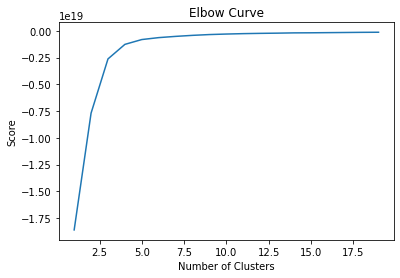

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There are multiple elbows: 2,3,5 so will say 5 clusters

# K-means clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df_subset)

KMeans(n_clusters=5)

In [14]:
df_subset['clusters'] = kmeans.fit_predict(df_subset)

C:\Users\alexa\AppData\Local\Temp\ipykernel_12268\2632181828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['clusters'] = kmeans.fit_predict(df_subset)


In [15]:
df_subset.head()

,Year,Total vote,Registration,VAP Turnout,Voting age population,Voter Turnout,Population,Invalid votes,clusters
0,2018,4000000,8843151,0.2181,18340292,0.4523,34940837,0.0000,3
1,2010,4216594,12000000,0.2971,14191908,0.3514,29120727,0.0442,3
2,2005,6406615,12977336,0.5171,12389532,0.4937,26334702,0.0510,3
3,2019,1824401,9600000,0.0963,18938369,0.1900,35780458,0.0000,3
4,2014,8109493,20845988,0.5003,16208255,0.3890,31822848,0.0168,3


In [16]:
df_subset['clusters'].value_counts()

3    1319
0     218
4      55
2      30
1       4
Name: clusters, dtype: int64

# Creating plot clusters

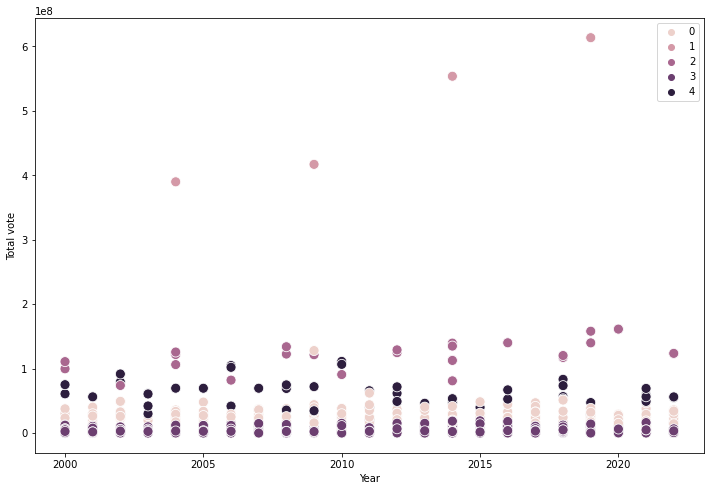

In [17]:
# Plot the clusters for the 'Year' and 'Total vote' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['Year'], y=df_subset['Total vote'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Year')
plt.ylabel('Total vote')
plt.show()

- The total votes per year are quite low in the 0and 3 cluster
- cluster 1 are the outliers
- cluster 2 and 4 are the mid range.

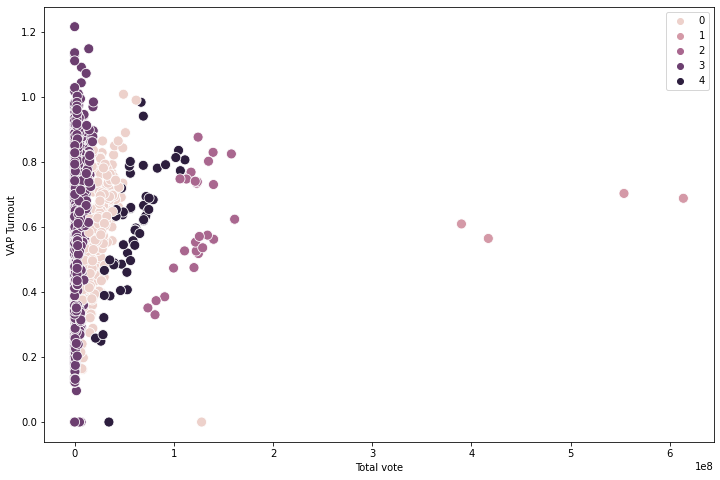

In [18]:
# Plot the clusters for the 'Year' and 'VAP Turnout' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['Total vote'], y=df_subset['VAP Turnout'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Total vote')
plt.ylabel('VAP Turnout')
plt.show()

- Cluster 0 demonstrates a very low voting age population turn out.
- Cluster 1 are the outliers
- Cluster 2 range about the 1
- cluster 3 and 4 range about in the mid 0.5.

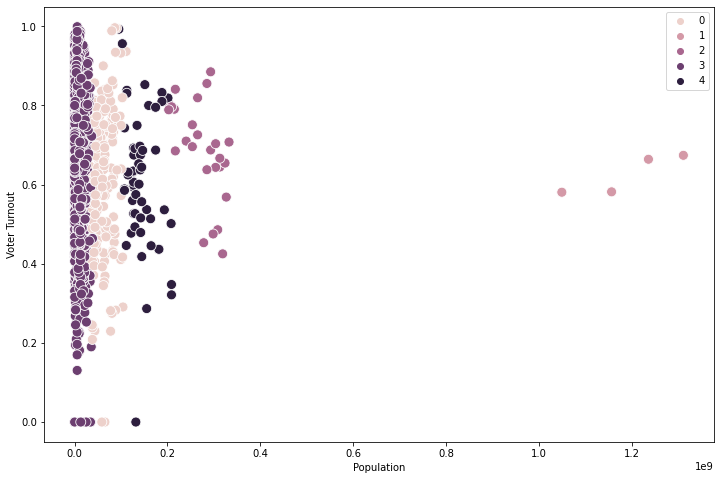

In [19]:
# Plot the clusters for the 'Population' and 'Voter Turnout' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['Population'], y=df_subset['Voter Turnout'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Population')
plt.ylabel('Voter Turnout')
plt.show()

- Cluster 0 demonstrates a very low voting turn out.
- Cluster 1 are the outliers
- Cluster 2 range about 0.3
- cluster 3 and 4 range about in the mid 0.1-0.2

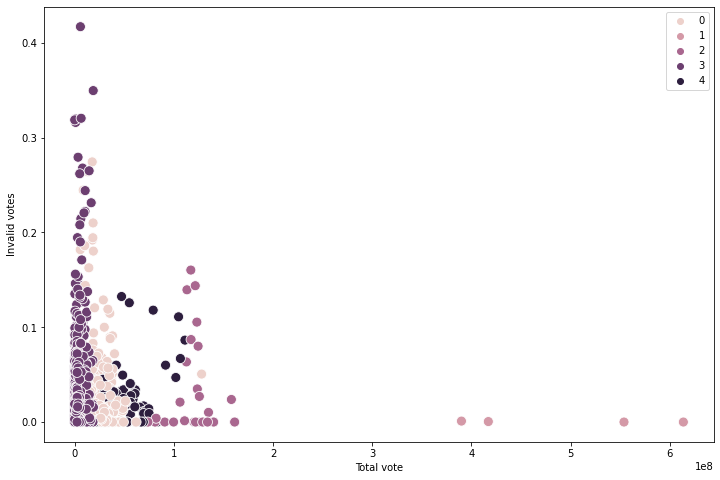

In [20]:
# Plot the clusters for the 'Total vote' and 'Invalid votes' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_subset['Total vote'], y=df_subset['Invalid votes'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Total vote')
plt.ylabel('Invalid votes')
plt.show()

- Cluster 0 demonstrates a very low counts of invalid votes per total votes.
- Cluster 1 are the outliers
- Cluster 2 range about the 1-1.5
- cluster 3 and 4 range about in the mid 0.5.

All of these plots clusters demonstrate around the same thing, most data revolves around 0 with a few outliers. Demonstrating low voter turn out.

# Grouping

In [21]:
df_subset.loc[df_subset['clusters'] == 0, 'cluster'] = 'light pink'
df_subset.loc[df_subset['clusters'] == 1, 'cluster'] = 'pink'
df_subset.loc[df_subset['clusters'] == 2, 'cluster'] = 'magenta'
df_subset.loc[df_subset['clusters'] == 3, 'cluster'] = 'purple'
df_subset.loc[df_subset['clusters'] == 4, 'cluster'] = 'black'

C:\Users\alexa\AppData\Local\Temp\ipykernel_12268\2657612303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.loc[df_subset['clusters'] == 0, 'cluster'] = 'light pink'


In [22]:
df_subset.groupby('cluster').agg({'Year':['mean', 'median'], 
                         'Total vote':['mean', 'median'], 
                         'Registration':['mean', 'median'],
                          'VAP Turnout':['mean', 'median'], 
                         'Voting age population':['mean', 'median'],
                        'Population':['mean', 'median'],
                        'Invalid votes':['mean', 'median']})

Year            Total vote               Registration  \
                   mean  median          mean       median          mean   
cluster                                                                    
black       2011.072727  2011.0  5.668559e+07   56185707.0  9.119776e+07   
light pink  2011.477064  2012.0  2.448006e+07   23061946.5  3.863883e+07   
magenta     2012.033333  2014.0  1.217195e+08  122890932.0  1.770655e+08   
pink        2011.500000  2011.5  4.936110e+08  485419703.5  7.832717e+08   
purple      2010.922669  2011.0  3.006631e+06    1963556.0  4.703112e+06   

                        VAP Turnout          Voting age population  \
                 median        mean   median                  mean   
cluster                                                              
black        89250881.0    0.580402  0.62220          9.578806e+07   
light pink   36680254.5    0.576155  0.59270          4.094534e+07   
magenta     181545527.0    0.620627  0.59915          2.034102e+08   
pink        775543290.0    0.641125  0.64855          7.646878e+08   
purple        3355429.0    0.584860  0.60880          5.070340e+06   

                           Population               Invalid votes           
                 median          mean        median          mean   median  
cluster                                                                     
black       102617759.0  1.410809e+08  1.380822e+08      0.029320  0.02200  
light pink   38752951.0  5.876061e+07  5.611932e+07      0.034857  0.01885  
magenta     210623408.0  2.732251e+08  2.849708e+08      0.030053  0.00000  
pink        763316997.0  1.188625e+09  1.196621e+09      0.000375  0.00025  
purple        3570328.0  8.094590e+06  5.307470e+06      0.027081  0.01520

- Total vote seems lower than the registered voters in all clusters
- Although the voter turnout is higher than the voting age population percentage. Something to investigate.
- Population is higher than the total vote and registration which is normal
- and the invalid votes are a fraction of the total vote which is a relief.

In [24]:
df_subset.to_csv(os.path.join(path, 'Main', 'orders_wrangled.csv'))